# Initialize

In [336]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/walmart-dataset/Walmart.csv


# Load Dataset

In [412]:
# load dataset into a dataframe
walmart_df = pd.read_csv("/kaggle/input/walmart-dataset/Walmart.csv")
# print dataframe source
print(walmart_df.shape)

(6435, 8)


# Data Preprocessing

In [413]:
# view the data
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [414]:
# check data types
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


* `Date` column should be converted to `datetime` data type.

## Check duplicates and missing values

In [415]:
# check duplicates
walmart_df.duplicated().sum()
# no need drop

0

In [416]:
# check missing values
walmart_df.isnull().sum() 
# no need to fill

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

## Transform

In [417]:
# preference - for consistency make all columns uppercase 
walmart_df.columns = walmart_df.columns.str.upper()

# display new columns
walmart_df.columns

Index(['STORE', 'DATE', 'WEEKLY_SALES', 'HOLIDAY_FLAG', 'TEMPERATURE',
       'FUEL_PRICE', 'CPI', 'UNEMPLOYMENT'],
      dtype='object')

In [419]:
# Convert 'Date_String' column to actual 'Date' format
#walmart_df['DATE'] = pd.to_datetime(walmart_df['DATE'], format='%d-%m-%Y')
walmart_df['DATE'] = pd.to_datetime(walmart_df['DATE'])

# Extract Year, Month, and Weekday into new separate columns
walmart_df['YEAR'] = walmart_df['DATE'].dt.year
walmart_df['MONTH'] = walmart_df['DATE'].dt.month
walmart_df['WEEKDAY'] = walmart_df['DATE'].dt.dayofweek

# Drop the original 'Date' column
walmart_df.drop(columns=['DATE'], inplace=True)

# view updated data
walmart_df

,STORE,WEEKLY_SALES,HOLIDAY_FLAG,TEMPERATURE,FUEL_PRICE,CPI,UNEMPLOYMENT,YEAR,MONTH,WEEKDAY
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,6
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,3
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,0
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,4
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,3
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,0
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,4


In [420]:
# summary statistics
walmart_df.describe()

,STORE,WEEKLY_SALES,HOLIDAY_FLAG,TEMPERATURE,FUEL_PRICE,CPI,UNEMPLOYMENT,YEAR,MONTH,WEEKDAY
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.475524,3.573427
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.321797,1.426581
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,0.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,4.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,4.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,4.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,6.000000


In [422]:
# check unique values
walmart_df[['STORE','HOLIDAY_FLAG','YEAR','MONTH','WEEKDAY']].nunique().sort_values()

HOLIDAY_FLAG     2
YEAR             3
WEEKDAY          7
MONTH           12
STORE           45
dtype: int64

## Visualize

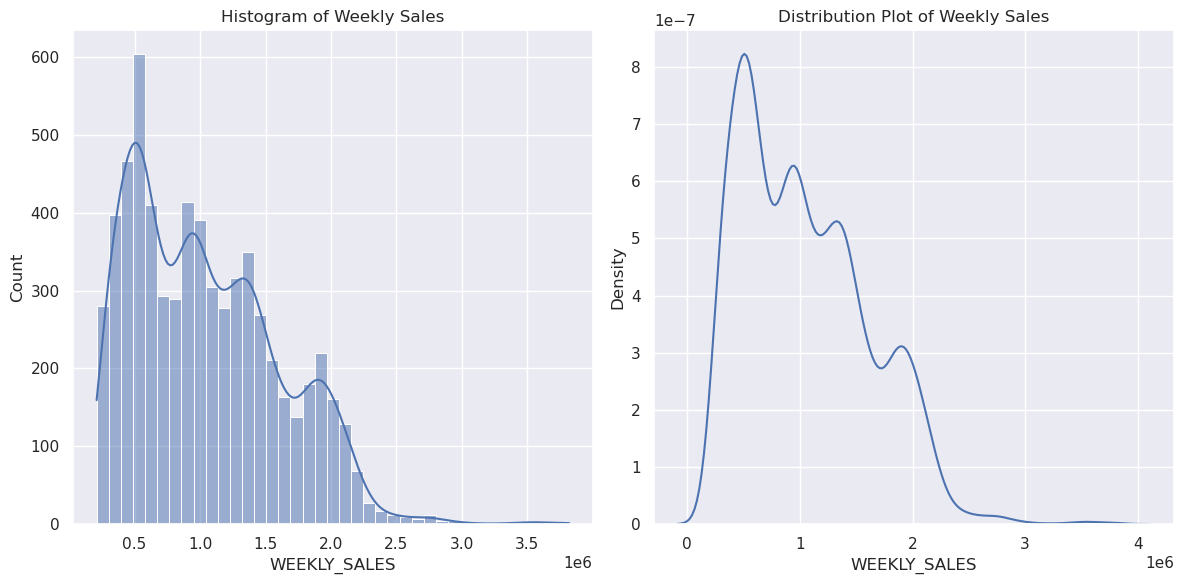

In [423]:
# Viz weekly sales frequency distribution
# Create a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram on the first subplot
sns.histplot(walmart_df['WEEKLY_SALES'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of Weekly Sales')
# Plot the distribution plot on the second subplot
sns.kdeplot(walmart_df['WEEKLY_SALES'], ax=axes[1])
axes[1].set_title('Distribution Plot of Weekly Sales')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

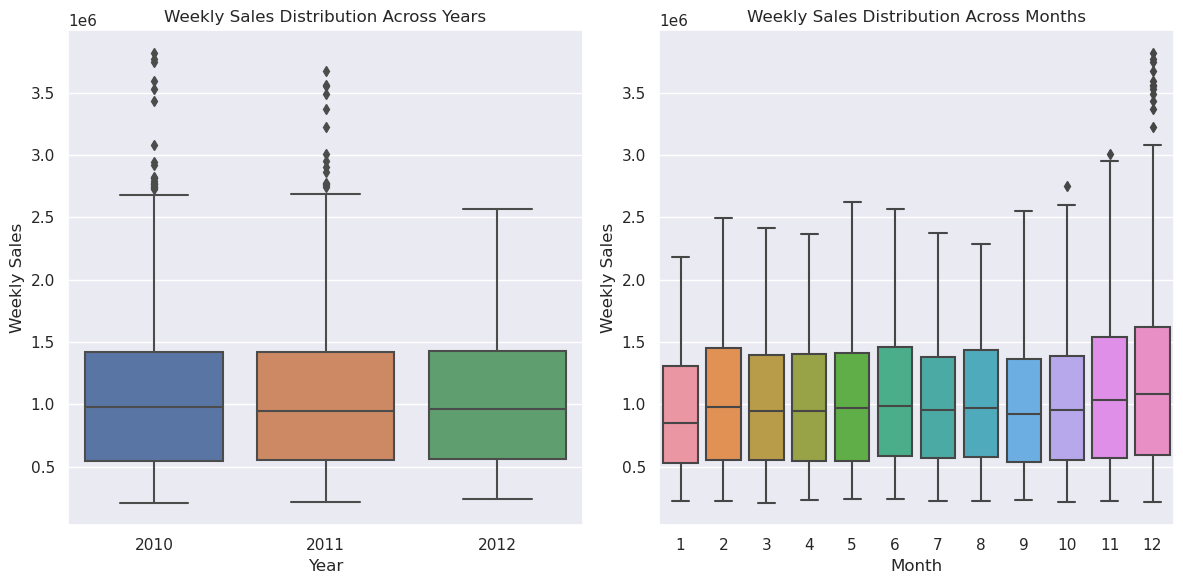

In [424]:
# Create a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for Weekly Sales across different 'Year'
sns.boxplot(data=walmart_df, x='YEAR', y='WEEKLY_SALES' , ax=axes[0])
axes[0].set_title('Weekly Sales Distribution Across Years')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Weekly Sales')

# Box plot for Weekly Sales across different 'Months'
sns.boxplot(data=walmart_df, x='MONTH', y='WEEKLY_SALES' , ax=axes[1])
axes[1].set_title('Weekly Sales Distribution Across Months')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Weekly Sales')
# Adjust the layout for better spacing
plt.tight_layout()
# Show the plot
plt.show()

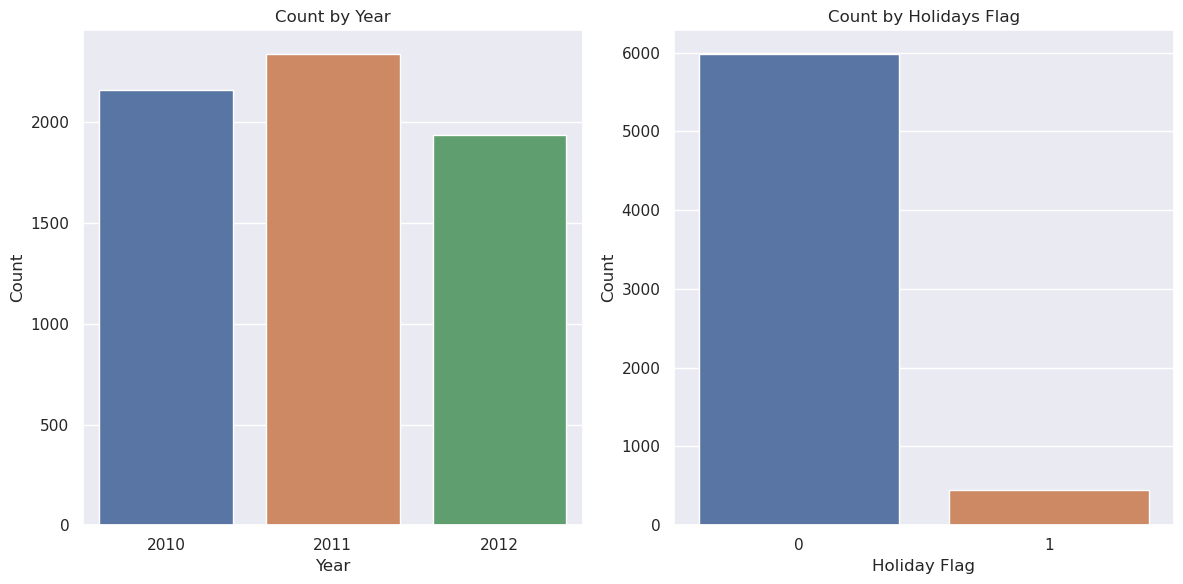

In [425]:
# Create a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the count of 'Store' on the first subplot
sns.countplot(data=walmart_df, x='YEAR', ax=axes[0])
axes[0].set_title('Count by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')
# Plot the count of 'Holiday_Flag' on the second subplot
sns.countplot(data=walmart_df, x='HOLIDAY_FLAG', ax=axes[1])
axes[1].set_title('Count by Holidays Flag')
axes[1].set_xlabel('Holiday Flag')
axes[1].set_ylabel('Count')
# Adjust the layout for better spacing
plt.tight_layout()
# Show the plot
plt.show()

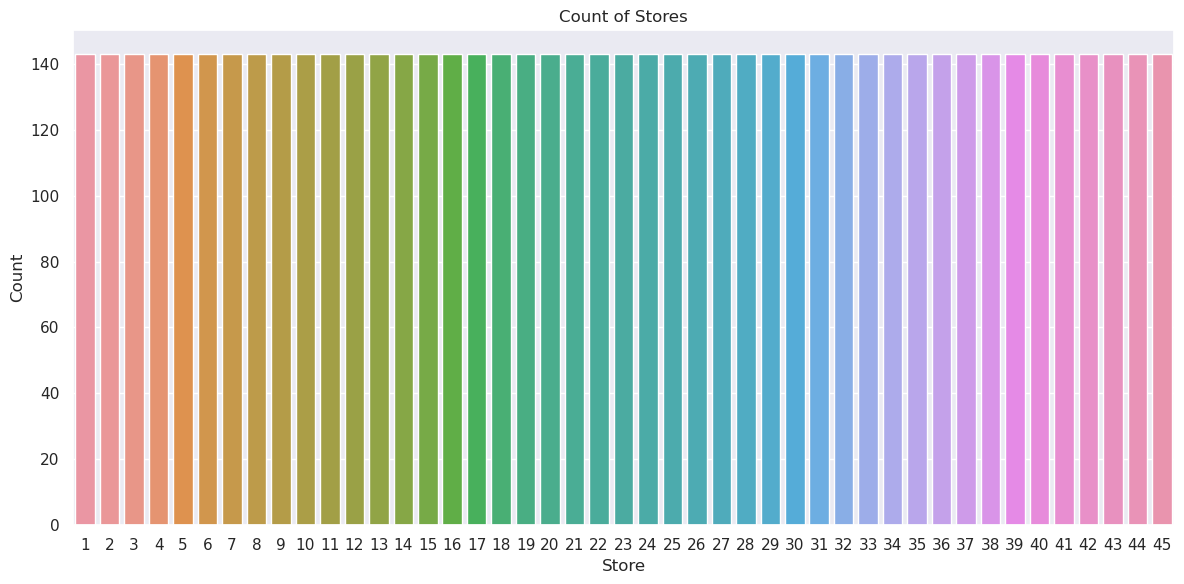

In [426]:
# Count plot for 'Store' and 'Holiday_Flag'
plt.figure(figsize=(12, 6))
#plt.subplot(1, 2, 1)
sns.countplot(data=walmart_df, x='STORE')
plt.title('Count of Stores')
plt.xlabel('Store')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

consistent data count per `STORE`

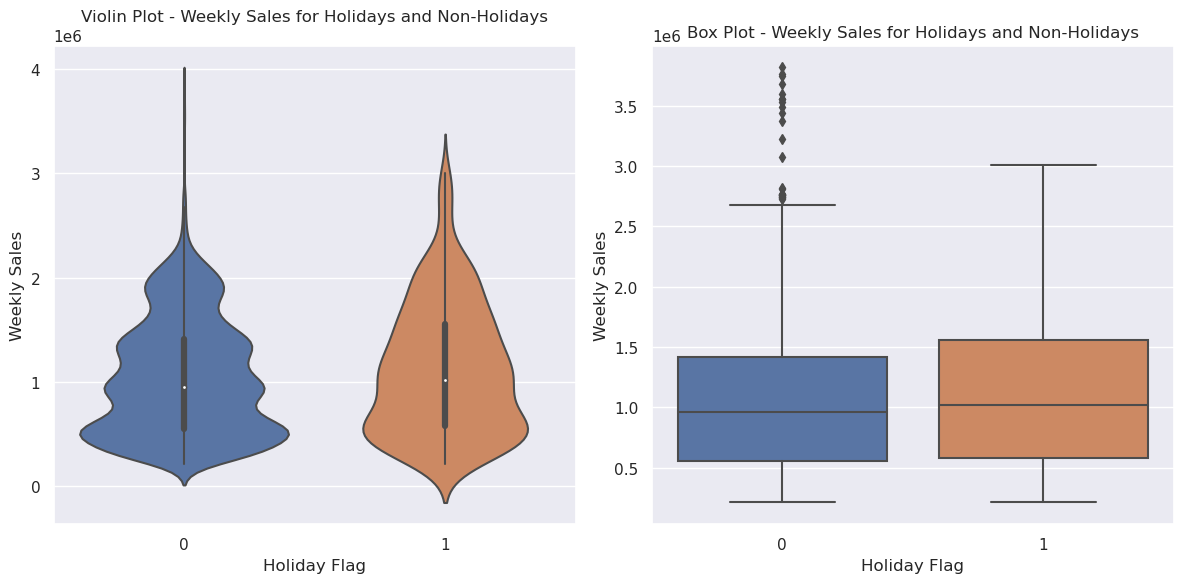

In [427]:
# Create a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the violin plot on the first subplot (axes[0])
sns.violinplot(data=walmart_df, x='HOLIDAY_FLAG', y='WEEKLY_SALES', ax=axes[0])
axes[0].set_title('Violin Plot - Weekly Sales for Holidays and Non-Holidays')
axes[0].set_xlabel('Holiday Flag')
axes[0].set_ylabel('Weekly Sales')

# Plot the box plot on the second subplot (axes[1])
sns.boxplot(data=walmart_df, x='HOLIDAY_FLAG', y='WEEKLY_SALES', ax=axes[1])
axes[1].set_title('Box Plot - Weekly Sales for Holidays and Non-Holidays')
axes[1].set_xlabel('Holiday Flag')
axes[1].set_ylabel('Weekly Sales')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [428]:
# define function
def hist_box_plot(df, columns):
    """
    Plot both histogram (row 1) and boxplot (row 2)
    """
    plot_columns = columns
    num_columns = len(plot_columns)
    num_rows = 2
        
    # Create a grid for subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 8))

    # Plot histograms for each column in the first row of the grid
    for i, col in enumerate(plot_columns):
        if num_columns == 1:
            sns.histplot(data=df, x=col, kde=True, ax=axes[0])
            axes[0].set_title(f'Histogram - {col}')
            axes[0].set_xlabel(col)
            axes[0].set_ylabel('Frequency')        
        else:
            sns.histplot(data=df, x=col, kde=True, ax=axes[0, i])
            axes[0, i].set_title(f'Histogram - {col}')
            axes[0, i].set_xlabel(col)
            axes[0, i].set_ylabel('Frequency')

    # Plot box plots for each column in the second row of the grid
    for i, col in enumerate(plot_columns):
        if num_columns == 1:
            sns.boxplot(data=df, y=col, ax=axes[1])
            axes[1].set_title(f'Box Plot - {col}')
            axes[1].set_xlabel(col)
            axes[1].set_ylabel('')            
        else:
            sns.boxplot(data=df, y=col, ax=axes[1, i])
            axes[1, i].set_title(f'Box Plot - {col}')
            axes[1, i].set_xlabel(col)
            axes[1, i].set_ylabel('')

    # Adjust the layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

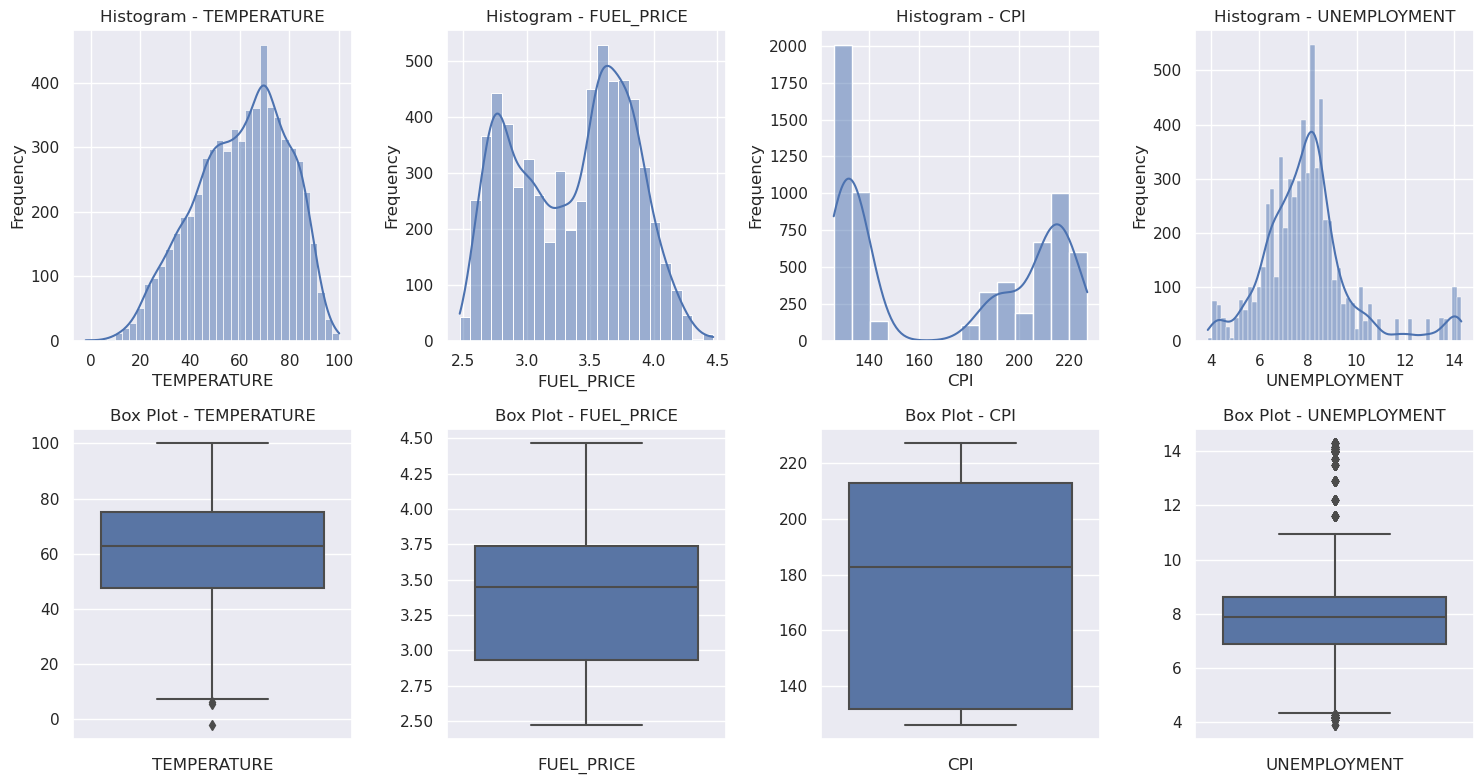

In [429]:
# histogram and boxplot
hist_box_plot(walmart_df, ['TEMPERATURE', 'FUEL_PRICE', 'CPI', 'UNEMPLOYMENT'])

We can see outliers on the data, particulary for `WEEKLY_SALES` and `UNEMPLOYMENT`.    
But without additional information behind those outliers, there is not strong reason to remove them.

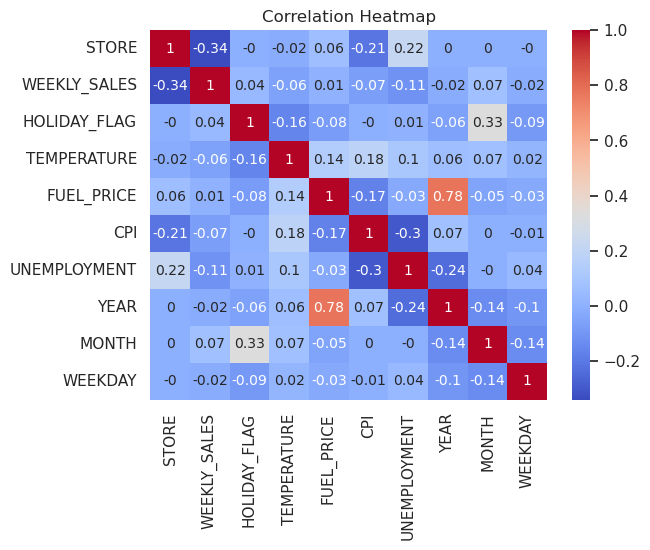

In [430]:
# Heatmap to visualize the correlation between numeric columns
correlation_matrix = walmart_df.corr().round(2)
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 10}, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Handle outliers

In [431]:
# create function
def remove_outliers(df, column):
    """
    Remove outliers from the specified column in the DataFrame.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [432]:
# copy data, new dataframe will be used to store data without outliers (ol).
walmart_df_no_ol = walmart_df.copy()

# removed outliers on WEEKLY_SALES
walmart_df_no_ol = remove_outliers(walmart_df_no_ol, 'WEEKLY_SALES')
# removed outliers on WEEKLY_SALES and 'UNEMPLOYMENT'
walmart_df_no_ol = remove_outliers(walmart_df_no_ol, 'UNEMPLOYMENT')


In [433]:
print(walmart_df.shape)
print(walmart_df_no_ol.shape)

(6435, 10)
(5920, 10)


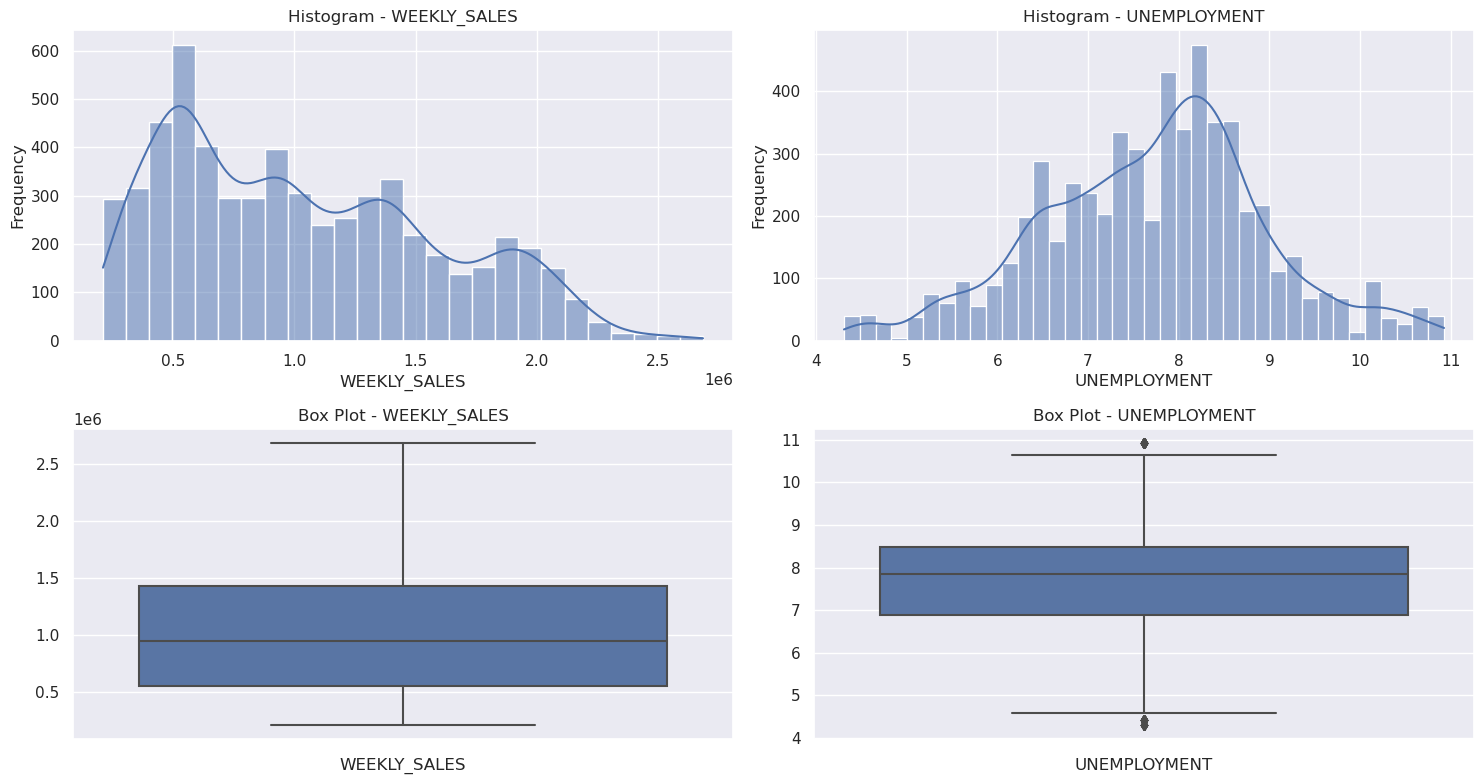

In [434]:
# check distributions 
# histogram and boxplot
hist_box_plot(walmart_df_no_ol, ['WEEKLY_SALES', 'UNEMPLOYMENT'])

## Set features and target variables

In [677]:
# create new dataframe to use for ML model
model_df= walmart_df.copy()
# sort values - this is import
model_df = model_df.sort_values(by=['YEAR','MONTH','WEEKDAY'])

target = 'WEEKLY_SALES'
# using all columns as features.
features = model_df.drop(columns=[target]).columns
num_features = len(features)
print(target)
print(features)

WEEKLY_SALES
Index(['STORE', 'HOLIDAY_FLAG', 'TEMPERATURE', 'FUEL_PRICE', 'CPI',
       'UNEMPLOYMENT', 'YEAR', 'MONTH', 'WEEKDAY'],
      dtype='object')


## Encode columns

In [678]:
# tag categorical 
model_df[['STORE','YEAR','MONTH','WEEKDAY']] = model_df[['STORE','YEAR','MONTH','WEEKDAY']].astype('category')
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 34 to 6432
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   STORE         6435 non-null   category
 1   WEEKLY_SALES  6435 non-null   float64 
 2   HOLIDAY_FLAG  6435 non-null   int64   
 3   TEMPERATURE   6435 non-null   float64 
 4   FUEL_PRICE    6435 non-null   float64 
 5   CPI           6435 non-null   float64 
 6   UNEMPLOYMENT  6435 non-null   float64 
 7   YEAR          6435 non-null   category
 8   MONTH         6435 non-null   category
 9   WEEKDAY       6435 non-null   category
dtypes: category(4), float64(5), int64(1)
memory usage: 379.3 KB


In [679]:

categorical_columns = model_df.select_dtypes(include='category').columns
# drop first column to avoid multicollinearity
model_df = pd.get_dummies(model_df, columns=categorical_columns, drop_first=True)

print(model_df.shape)
model_df

(6435, 69)


,WEEKLY_SALES,HOLIDAY_FLAG,TEMPERATURE,FUEL_PRICE,CPI,UNEMPLOYMENT,STORE_2,STORE_3,STORE_4,STORE_5,...,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6
34,1453329.50,0,71.89,2.603,211.671989,7.838,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
177,1827440.43,0,69.24,2.603,211.329874,8.163,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
320,358784.10,0,73.60,2.603,214.984655,7.564,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
463,1842821.02,0,63.96,2.619,126.234600,7.127,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
606,283178.12,0,71.10,2.603,212.226946,6.768,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,1409544.97,0,39.38,3.760,199.053937,6.195,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6003,612379.90,0,76.03,4.468,131.108333,6.943,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6146,619369.72,0,71.14,3.601,214.677283,8.839,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6289,337796.13,0,55.10,3.797,131.108333,5.217,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Standardize

In [682]:
# use to test for non standardized dataset
model_df_ns = model_df.copy()

In [683]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

standardize_columns = ['TEMPERATURE', 'FUEL_PRICE', 'CPI', 'UNEMPLOYMENT']
model_df[standardize_columns]

# Create the StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected feature columns using the StandardScaler
model_df[standardize_columns] = scaler.fit_transform(model_df[standardize_columns])

# redifine features
# using all columns as features.
transformed_features = model_df.drop(columns=[target]).columns
num_features = len(transformed_features)

print(transformed_features)

Index(['HOLIDAY_FLAG', 'TEMPERATURE', 'FUEL_PRICE', 'CPI', 'UNEMPLOYMENT',
       'STORE_2', 'STORE_3', 'STORE_4', 'STORE_5', 'STORE_6', 'STORE_7',
       'STORE_8', 'STORE_9', 'STORE_10', 'STORE_11', 'STORE_12', 'STORE_13',
       'STORE_14', 'STORE_15', 'STORE_16', 'STORE_17', 'STORE_18', 'STORE_19',
       'STORE_20', 'STORE_21', 'STORE_22', 'STORE_23', 'STORE_24', 'STORE_25',
       'STORE_26', 'STORE_27', 'STORE_28', 'STORE_29', 'STORE_30', 'STORE_31',
       'STORE_32', 'STORE_33', 'STORE_34', 'STORE_35', 'STORE_36', 'STORE_37',
       'STORE_38', 'STORE_39', 'STORE_40', 'STORE_41', 'STORE_42', 'STORE_43',
       'STORE_44', 'STORE_45', 'YEAR_2011', 'YEAR_2012', 'MONTH_2', 'MONTH_3',
       'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9',
       'MONTH_10', 'MONTH_11', 'MONTH_12', 'WEEKDAY_1', 'WEEKDAY_2',
       'WEEKDAY_3', 'WEEKDAY_4', 'WEEKDAY_5', 'WEEKDAY_6'],
      dtype='object')


### Split to test and train

In [685]:
# train 80%, test will be 20%
train_size = int(len(model_df) * 0.8)
# Split the data into training and testing sets 
train_data = model_df[:train_size]
test_data = model_df[train_size:]

X_train, y_train = train_data.drop(columns=[target]), train_data[target]
X_test, y_test = test_data.drop(columns=[target]), test_data[target]

# Train and Test

## RandomForestRegressor

### Train

In [593]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the Random Forest model and train on the training data
model_rfr = RandomForestRegressor()
model_rfr.fit(X_train, y_train)

RandomForestRegressor()

### Test and Check Results

In [594]:
# Make predictions on the test data
rfr_y_train_pred = model_rfr.predict(X_train)
rfr_y_test_pred = model_rfr.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) for train and test
rfr_rmse_train = np.sqrt(mean_squared_error(y_train, rfr_y_train_pred))
rfr_rmse_test = np.sqrt(mean_squared_error(y_test,rfr_y_test_pred))

# Calculate Mean Squared Error (MSE) and R-squared (R2) for evaluation
rfr_r2_train = r2_score(y_train, rfr_y_train_pred)
rfr_r2_test = r2_score(y_test, rfr_y_test_pred)

print(f'Mean Squared Error (MSE): {rfr_rmse_train}')
print(f'R-squared (R2): {rfr_r2_train}')
print(f'Mean Squared Error (MSE): {rfr_rmse_test}')
print(f'R-squared (R2): {rfr_r2_test}')

Mean Squared Error (MSE): 55837.76666774561
R-squared (R2): 0.9904496250297125
Mean Squared Error (MSE): 96498.16846316503
R-squared (R2): 0.967474300103385


### Visualize original vs predicted values

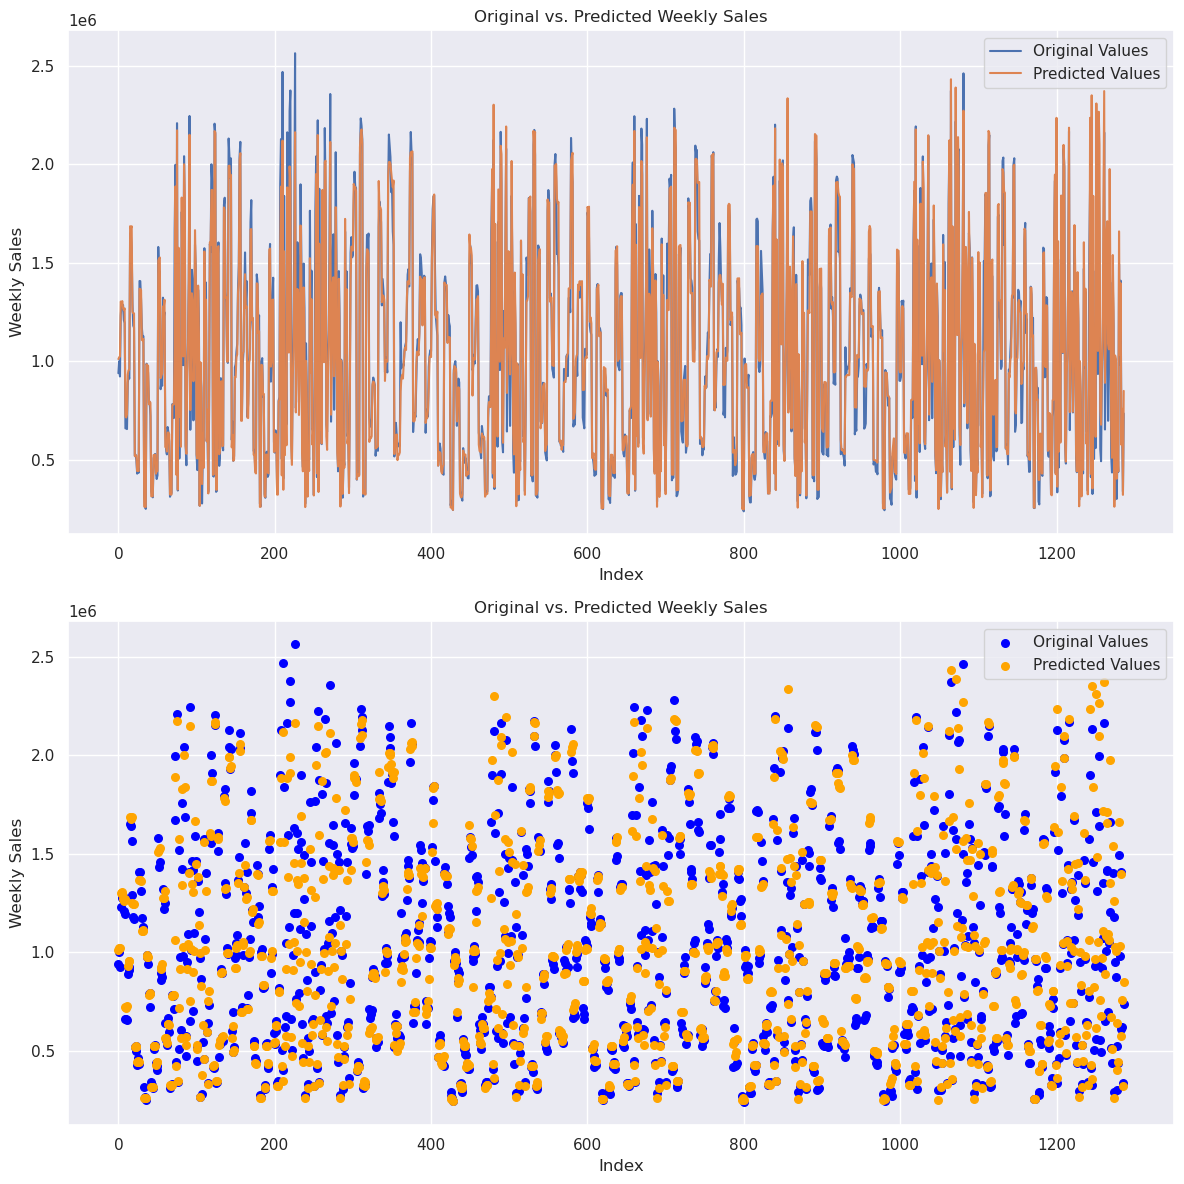

In [595]:
# Create an arbitrary sequential index for better visualization
index = np.arange(len(y_test))

# Create a 2x1 subplot
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot the original values in the first subplot
axes[0].plot(index, y_test, label='Original Values')
axes[0].plot(index, rfr_y_test_pred, label='Predicted Values')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Weekly Sales')
axes[0].set_title('Original vs. Predicted Weekly Sales')
axes[0].legend()

# Scatter plot of the predicted values in the second subplot
axes[1].scatter(index, y_test, label='Original Values', color='blue', marker='o', s=30)
axes[1].scatter(index, rfr_y_test_pred, label='Predicted Values', color='orange', marker='o', s=30)
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Weekly Sales')
axes[1].set_title('Original vs. Predicted Weekly Sales')
axes[1].grid(True)  # Add grid lines for better readability
axes[1].legend()

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()


## Multiple Linear Regression(MLR)

### Train

In [658]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the Multiple Linear Regression model
model_mlr = LinearRegression()

# Train the model on the training data
model_mlr.fit(X_train, y_train)

# Make predictions on the training and test data
mlr_y_train_pred = model_mlr.predict(X_train)
mlr_y_test_pred = model_mlr.predict(X_test)

### Test and Check Results

In [659]:
# Calculate Root Mean Squared Error (RMSE) for train and test
mlr_rmse_train = np.sqrt(mean_squared_error(y_train, mlr_y_train_pred))
mlr_rmse_test = np.sqrt(mean_squared_error(y_test, mlr_y_test_pred))

# Calculate R-squared (R2) for evaluation
mlr_r2_train = r2_score(y_train, mlr_y_train_pred)
mlr_r2_test = r2_score(y_test, mlr_y_test_pred)

print(f'Multiple Linear Regression (MLR):')
print(f'Train - Root Mean Squared Error (RMSE): {mlr_rmse_train}')
print(f'Train - R-squared (R2): {mlr_r2_train}')
print(f'Test - Root Mean Squared Error (RMSE): {mlr_rmse_test}')
print(f'Test - R-squared (R2): {mlr_r2_test}')


Multiple Linear Regression (MLR):
Train - Root Mean Squared Error (RMSE): 153829.71297403928
Train - R-squared (R2): 0.9275155573910074
Test - Root Mean Squared Error (RMSE): 131988.0623495511
Test - R-squared (R2): 0.939150387616558


### Visualize original vs predicted values

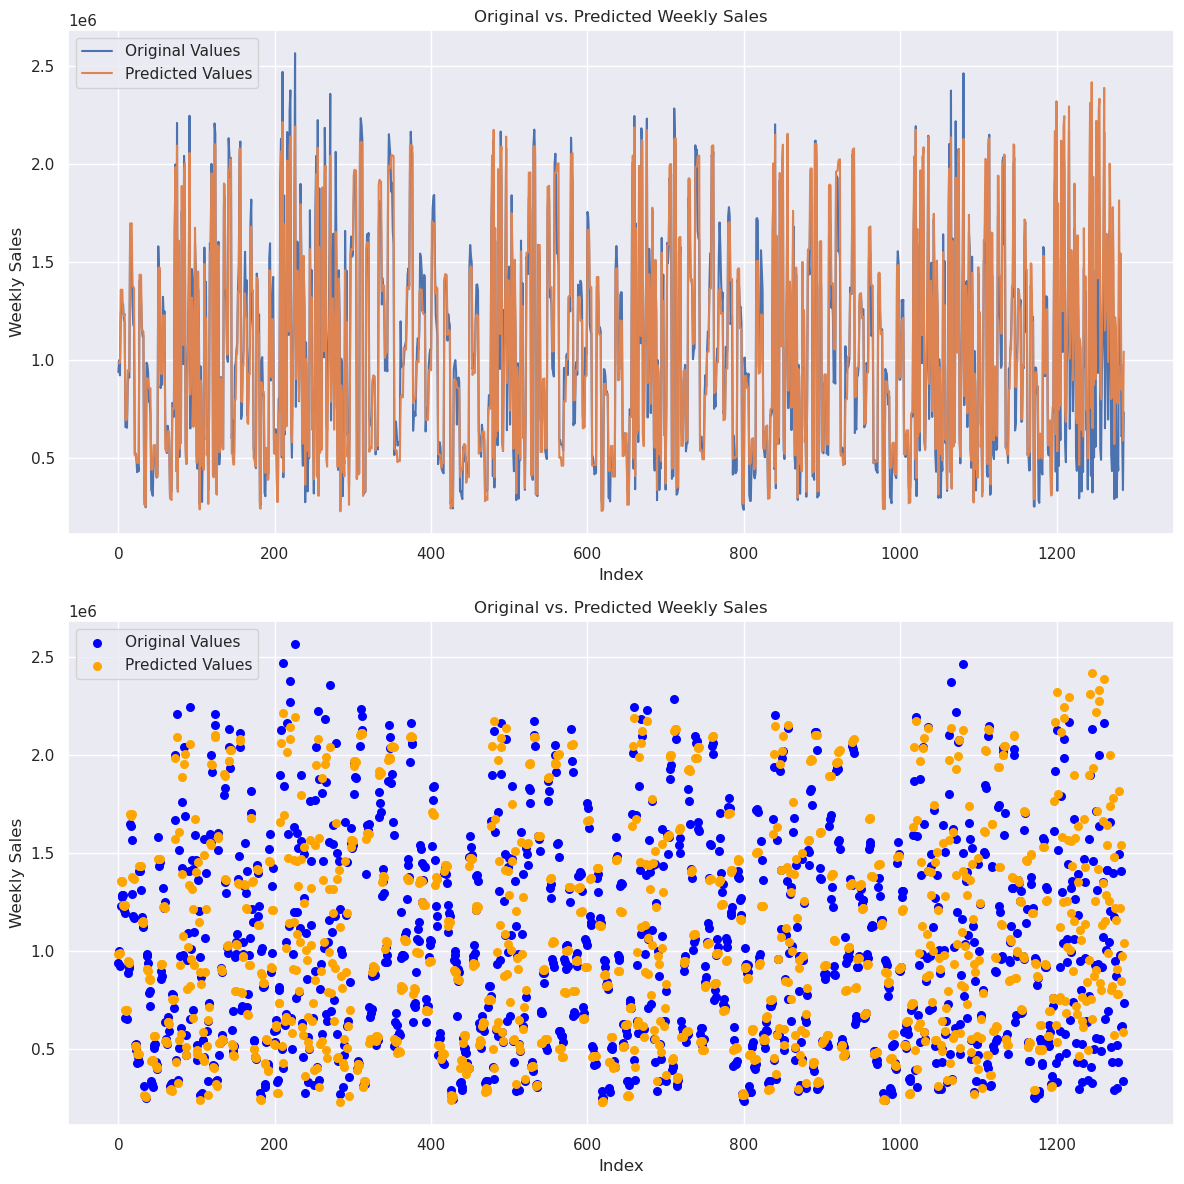

In [660]:
# Create an arbitrary sequential index for better visualization
index = np.arange(len(y_test))

# Create a 2x1 subplot
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot the original values in the first subplot
axes[0].plot(index, y_test, label='Original Values')
axes[0].plot(index, mlr_y_test_pred, label='Predicted Values')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Weekly Sales')
axes[0].set_title('Original vs. Predicted Weekly Sales')
axes[0].legend()

# Scatter plot of the predicted values in the second subplot
axes[1].scatter(index, y_test, label='Original Values', color='blue', marker='o', s=30)
axes[1].scatter(index, mlr_y_test_pred, label='Predicted Values', color='orange', marker='o', s=30)
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Weekly Sales')
axes[1].set_title('Original vs. Predicted Weekly Sales')
axes[1].grid(True)  # Add grid lines for better readability
axes[1].legend()

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()


## Ridge Regression

### Train

In [693]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Create the Ridge Regression model
model_ridge = Ridge(alpha=1.0)  # You can adjust the value of alpha for different regularization strengths

# Train the model on the training data
model_ridge.fit(X_train, y_train)

# Make predictions on the training and test data
ridge_y_train_pred = model_ridge.predict(X_train)
ridge_y_test_pred = model_ridge.predict(X_test)

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Create the Elastic-Net Regression model
model_en = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust the values of alpha and l1_ratio for different regularization strengths


### Test and Check Results

In [694]:
# Calculate Root Mean Squared Error (RMSE) for train and test
ridge_rmse_train = np.sqrt(mean_squared_error(y_train, ridge_y_train_pred))
ridge_rmse_test = np.sqrt(mean_squared_error(y_test, ridge_y_test_pred))

# Calculate R-squared (R2) for evaluation
ridge_r2_train = r2_score(y_train, ridge_y_train_pred)
ridge_r2_test = r2_score(y_test, ridge_y_test_pred)

print(f'Ridge Regression:')
print(f'Train - Root Mean Squared Error (RMSE): {ridge_rmse_train}')
print(f'Train - R-squared (R2): {ridge_r2_train}')
print(f'Test - Root Mean Squared Error (RMSE): {ridge_rmse_test}')
print(f'Test - R-squared (R2): {ridge_r2_test}')

Ridge Regression:
Train - Root Mean Squared Error (RMSE): 154828.4586923432
Train - R-squared (R2): 0.9265712855170594
Test - Root Mean Squared Error (RMSE): 133241.2643238507
Test - R-squared (R2): 0.9379893905491311


### Visualize original vs predicted values

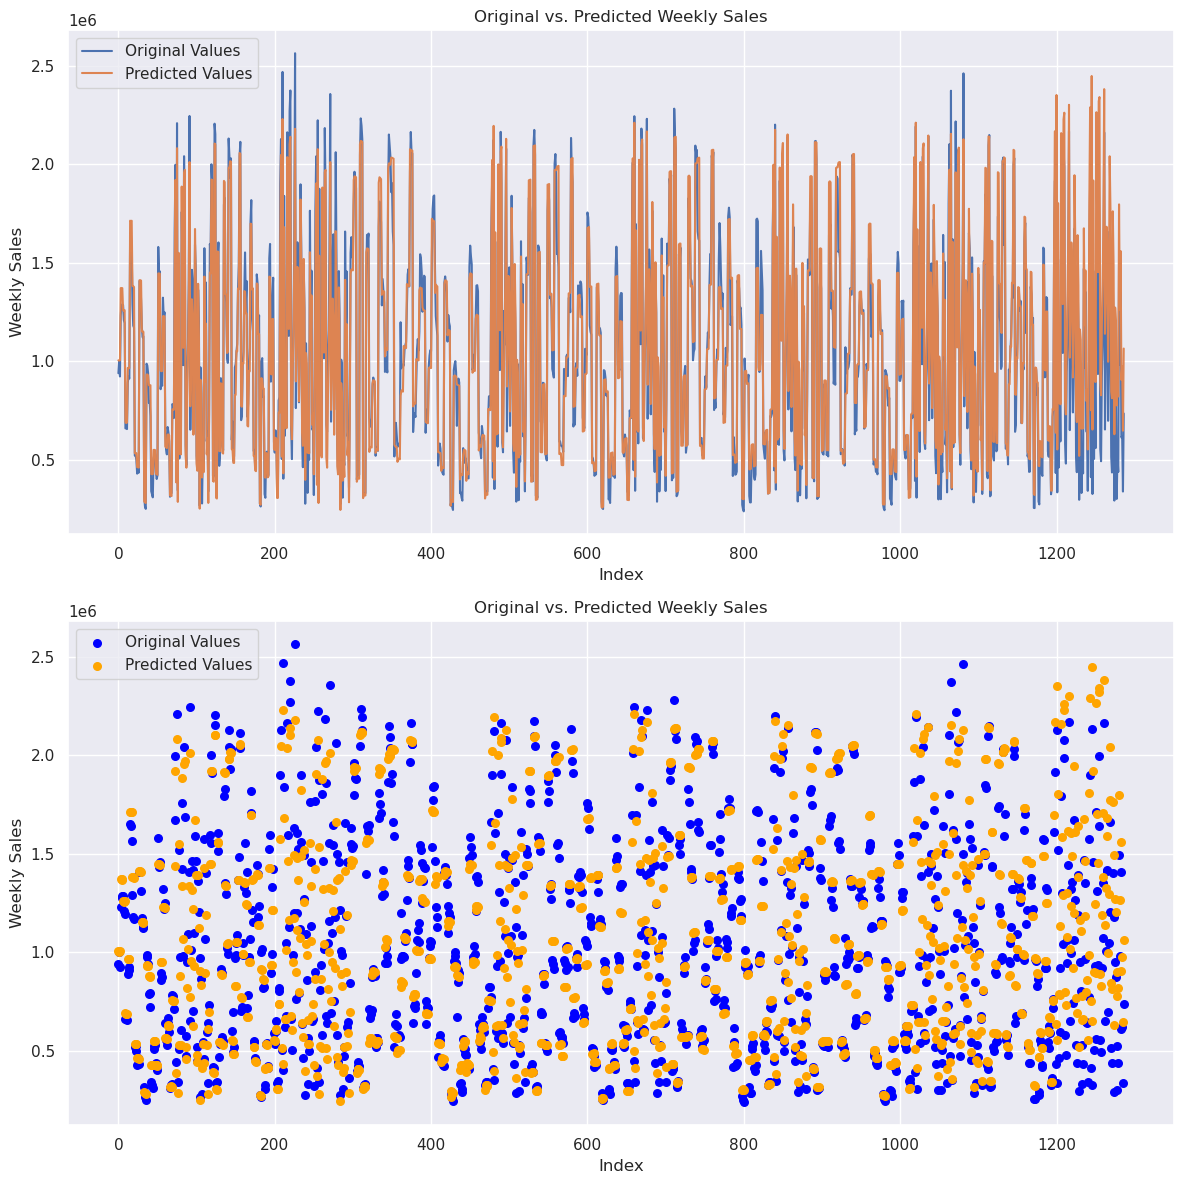

In [695]:
# Create an arbitrary sequential index for better visualization
index = np.arange(len(y_test))

# Create a 2x1 subplot
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot the original values in the first subplot
axes[0].plot(index, y_test, label='Original Values')
axes[0].plot(index, ridge_y_test_pred, label='Predicted Values')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Weekly Sales')
axes[0].set_title('Original vs. Predicted Weekly Sales')
axes[0].legend()

# Scatter plot of the predicted values in the second subplot
axes[1].scatter(index, y_test, label='Original Values', color='blue', marker='o', s=30)
axes[1].scatter(index, ridge_y_test_pred, label='Predicted Values', color='orange', marker='o', s=30)
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Weekly Sales')
axes[1].set_title('Original vs. Predicted Weekly Sales')
axes[1].grid(True)  # Add grid lines for better readability
axes[1].legend()

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()


## Elastic-Net Regression

### Train

In [707]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Create the Elastic-Net Regression model
model_en = ElasticNet(alpha=0.5, l1_ratio=0.5) 

# Train the model on the training data
model_en.fit(X_train, y_train)

# Make predictions on the training and test data
en_y_train_pred = model_en.predict(X_train)
en_y_test_pred = model_en.predict(X_test)

### Test and Check Results

In [708]:
# Calculate Root Mean Squared Error (RMSE) for train and test
en_rmse_train = np.sqrt(mean_squared_error(y_train, en_y_train_pred))
en_rmse_test = np.sqrt(mean_squared_error(y_test, en_y_test_pred))

# Calculate R-squared (R2) for evaluation
en_r2_train = r2_score(y_train, en_y_train_pred)
en_r2_test = r2_score(y_test, en_y_test_pred)

print(f'Elastic-Net Regression:')
print(f'Train - Root Mean Squared Error (RMSE): {en_rmse_train}')
print(f'Train - R-squared (R2): {en_r2_train}')
print(f'Test - Root Mean Squared Error (RMSE): {en_rmse_test}')
print(f'Test - R-squared (R2): {en_r2_test}')

Elastic-Net Regression:
Train - Root Mean Squared Error (RMSE): 522166.20689083013
Train - R-squared (R2): 0.1648165718605259
Test - Root Mean Squared Error (RMSE): 487714.981267247
Test - R-squared (R2): 0.1691536776468786


### Visualize original vs predicted values

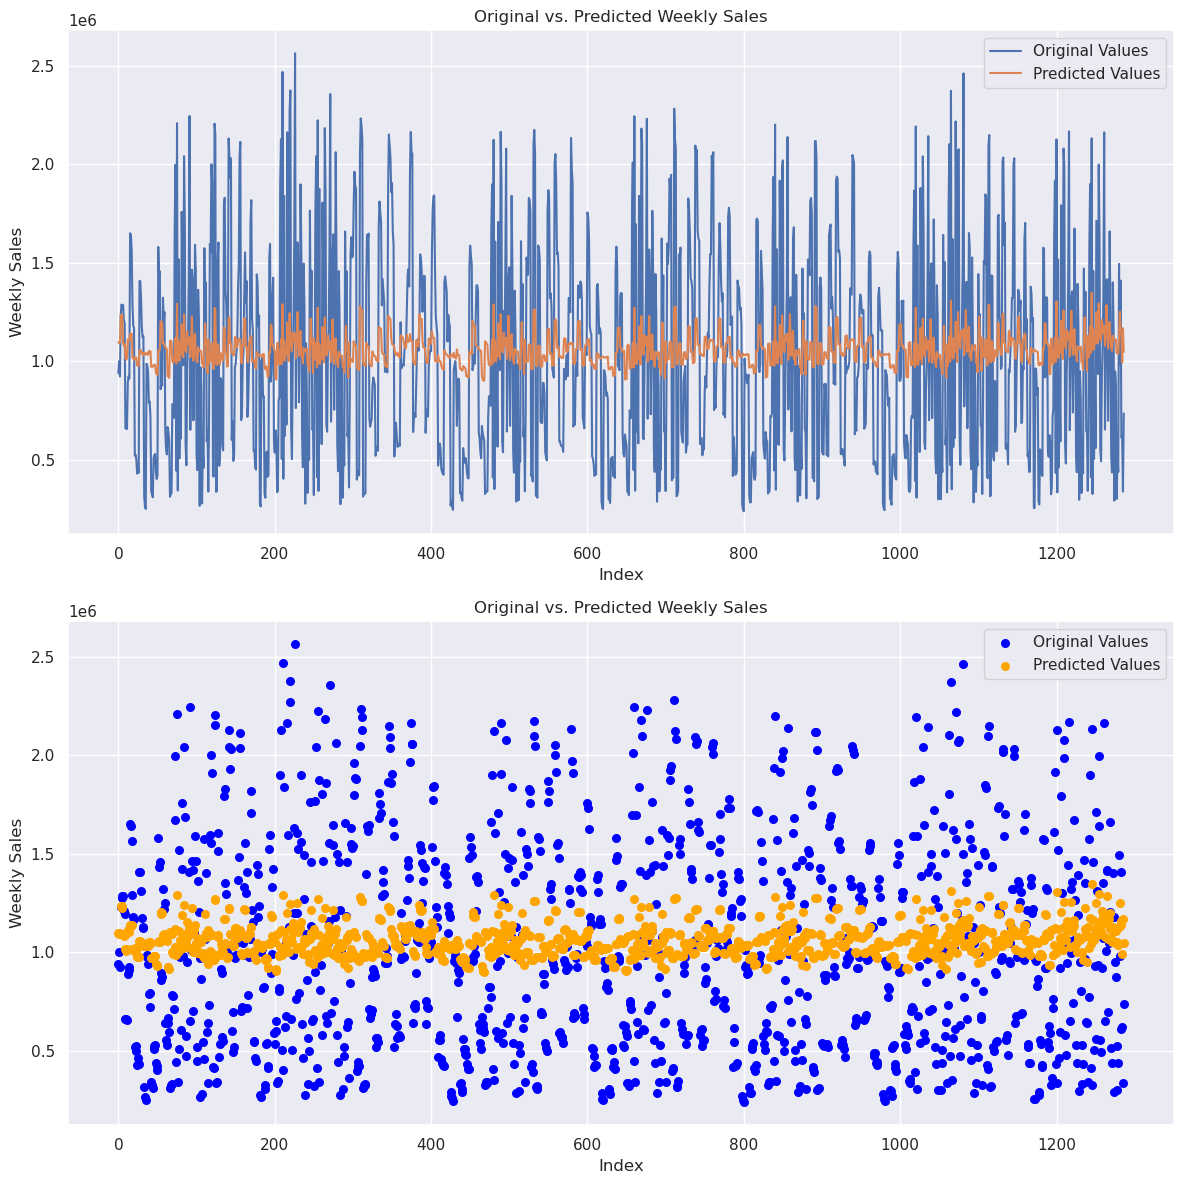

In [709]:
# Create an arbitrary sequential index for better visualization
index = np.arange(len(y_test))

# Create a 2x1 subplot
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot the original values in the first subplot
axes[0].plot(index, y_test, label='Original Values')
axes[0].plot(index, en_y_test_pred, label='Predicted Values')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Weekly Sales')
axes[0].set_title('Original vs. Predicted Weekly Sales')
axes[0].legend()

# Scatter plot of the predicted values in the second subplot
axes[1].scatter(index, y_test, label='Original Values', color='blue', marker='o', s=30)
axes[1].scatter(index, en_y_test_pred, label='Predicted Values', color='orange', marker='o', s=30)
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Weekly Sales')
axes[1].set_title('Original vs. Predicted Weekly Sales')
axes[1].grid(True)  # Add grid lines for better readability
axes[1].legend()

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()
